<h1 style="color:blue;">KaggleCompetion</h1>
*

<h2>name : ghada abu shaqra </h2>
<ol>
<i>IDnum: 164188</i>

# Dependencies    

In [2]:
# the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Read data

In [4]:
path_train='Desktop/MLghada/spambase_train.csv'
path_test='Desktop/MLghada/spambase_test.csv'

In [7]:
train_data=pd.read_csv(path_train,sep=",")
test_data=pd.read_csv(path_test,sep=",")

# data analysis

In [10]:
train_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
0,0.00,0.0,1.12,0.0,0.56,0.00,0.0,0.00,0.00,0.56,...,0.101,0.00,0.606,0.000,0.0,2.360,19,144,1,29
1,0.32,0.0,0.64,0.0,0.32,0.32,0.0,1.61,0.32,0.64,...,0.160,0.00,1.178,0.107,0.0,3.613,63,318,1,3792
2,0.00,0.0,0.00,0.0,0.34,0.00,0.0,0.34,0.00,1.70,...,0.055,0.11,0.000,0.000,0.0,1.421,8,91,0,1317
3,0.19,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.108,0.00,0.000,0.108,0.0,2.634,23,303,0,3309
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.746,0.00,0.000,0.000,0.0,1.687,4,27,0,3342


In [12]:
train_data.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
3215,0.0,0.00,4.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.000,0.0,0.613,0.0,0.000,1.000,1,14,0,1105
3216,0.0,0.00,0.00,0.0,4.16,0.00,0.00,0.0,0.0,0.00,...,0.689,0.0,0.689,0.0,0.000,1.300,4,13,0,4440
3217,0.0,0.00,0.00,0.0,1.11,0.00,0.00,0.0,0.0,0.00,...,0.000,0.0,0.784,0.0,0.000,5.687,39,91,1,51
3218,0.0,0.57,0.57,0.0,1.14,0.57,2.28,0.0,0.0,0.57,...,0.081,0.0,0.487,0.0,0.081,16.217,147,373,1,2189
3219,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.484,0.0,0.484,0.0,0.000,2.500,15,65,0,38


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              1381 non-null   float64
 1   word_freq_address           1381 non-null   float64
 2   word_freq_all               1381 non-null   float64
 3   word_freq_3d                1381 non-null   float64
 4   word_freq_our               1381 non-null   float64
 5   word_freq_over              1381 non-null   float64
 6   word_freq_remove            1381 non-null   float64
 7   word_freq_internet          1381 non-null   float64
 8   word_freq_order             1381 non-null   float64
 9   word_freq_mail              1381 non-null   float64
 10  word_freq_receive           1381 non-null   float64
 11  word_freq_will              1381 non-null   float64
 12  word_freq_people            1381 non-null   float64
 13  word_freq_report            1381 

In [16]:
train_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,0.107565,0.219578,0.275407,0.058829,0.314683,0.097298,0.118898,0.099686,0.091453,0.229345,...,0.143251,0.017520,0.270860,0.077458,0.041834,5.457483,52.505280,274.024534,0.394099,2278.129503
std,0.314254,1.327783,0.503584,1.259640,0.651033,0.284463,0.409209,0.346193,0.287124,0.554067,...,0.298311,0.122903,0.878821,0.266767,0.460444,35.093870,216.894496,587.004441,0.488732,1334.489903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.583000,6.000000,34.000000,0.000000,1124.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.064000,0.000000,0.000000,0.000000,0.000000,2.276500,15.000000,93.000000,0.000000,2253.500000
75%,0.000000,0.000000,0.410000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.190250,0.000000,0.319250,0.051000,0.000000,3.706250,43.000000,261.000000,1.000000,3433.250000
max,4.540000,14.280000,5.100000,42.810000,9.090000,5.880000,7.270000,4.680000,5.260000,7.550000,...,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000,4600.000000


In [55]:
#Check for missing values
null_v=train_data.isnull().sum()
print("sum of null value :",null_v.sum())

sum of null value : 0


In [20]:
train_data["spam"].value_counts()

spam
0    1951
1    1269
Name: count, dtype: int64

In [63]:
train_data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
word_freq_make,1.000000,-0.015178,0.068007,0.029119,0.025865,0.063261,0.008593,-0.000671,0.108974,0.052347,...,-0.024680,-0.031960,0.051762,0.117912,-0.006680,0.043674,0.051051,0.084290,0.131029,0.028406
word_freq_address,-0.015178,1.000000,-0.035414,-0.006466,-0.028681,-0.026243,-0.001157,-0.020947,-0.007229,0.043632,...,-0.048455,-0.018171,-0.013618,-0.012257,0.004468,0.001738,-0.001105,-0.023612,-0.032732,-0.028225
word_freq_all,0.068007,-0.035414,1.000000,-0.017582,0.086555,0.092915,0.037936,0.023580,0.103630,0.050422,...,-0.021463,-0.034671,0.091616,0.083804,0.001668,0.097698,0.101954,0.078637,0.200755,0.000915
word_freq_3d,0.029119,-0.006466,-0.017582,1.000000,0.018287,-0.006212,0.026138,0.026521,0.004592,-0.010300,...,-0.013407,-0.006548,-0.000379,0.007320,0.000982,0.005071,0.023249,0.029728,0.056868,-0.005756
word_freq_our,0.025865,-0.028681,0.086555,0.018287,1.000000,0.060836,0.174343,0.046460,0.026927,0.046353,...,-0.050027,-0.024133,0.026356,0.049387,0.006801,0.053958,0.053604,0.008972,0.268415,-0.024753
word_freq_over,0.063261,-0.026243,0.092915,-0.006212,0.060836,1.000000,0.046598,0.085727,0.103292,0.010436,...,0.004016,-0.007757,0.064504,0.108157,0.016893,-0.010106,0.078958,0.082867,0.238620,0.004731
word_freq_remove,0.008593,-0.001157,0.037936,0.026138,0.174343,0.046598,1.000000,0.063559,0.060953,0.081172,...,-0.047004,-0.025305,0.054920,0.056837,0.046980,0.038488,0.053911,-0.006547,0.327720,-0.004791
word_freq_internet,-0.000671,-0.020947,0.023580,0.026521,0.046460,0.085727,0.063559,1.000000,0.110112,0.121760,...,-0.023356,-0.022369,0.035904,0.061802,-0.009152,0.016379,0.039997,0.053092,0.217240,-0.018928
word_freq_order,0.108974,-0.007229,0.103630,0.004592,0.026927,0.103292,0.060953,0.110112,1.000000,0.153064,...,-0.029928,0.004773,0.037876,0.133884,0.000633,0.108902,0.160635,0.232871,0.229915,0.006472
word_freq_mail,0.052347,0.043632,0.050422,-0.010300,0.046353,0.010436,0.081172,0.121760,0.153064,1.000000,...,0.007377,0.014736,0.040062,0.077532,0.043593,0.078487,0.099912,0.101651,0.189075,0.008706


# Correlation Heatmap 

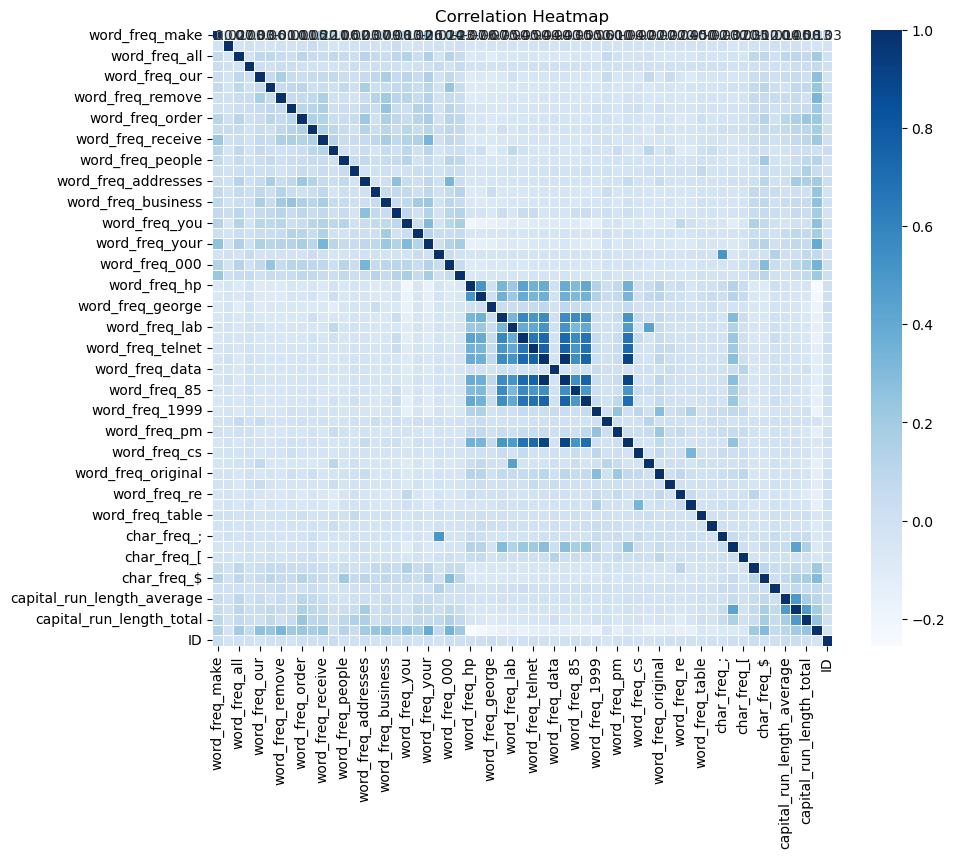

In [95]:

plt.figure(figsize=(10, 8))

# Create the heatmap with blue color, annotations, and specific formatting
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', linewidths=0.6, cmap='Blues')

#  title
plt.title("Correlation Heatmap")


plt.show()

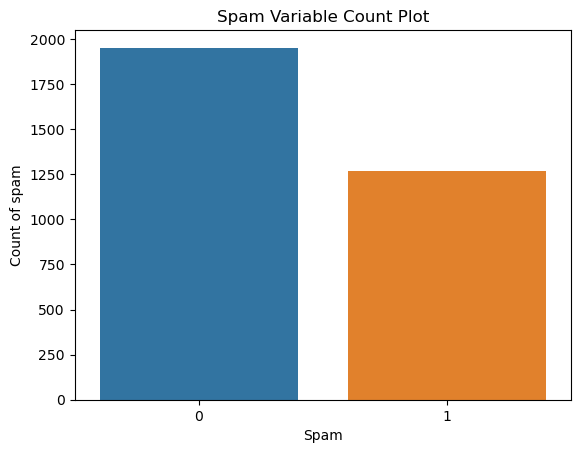

In [22]:
# count plot shows the counts of observations in each category of a categorical variable

sns.countplot(x='spam', data=train_data)
plt.xlabel("Spam")
plt.ylabel("Count of spam")
plt.title("Spam Variable Count Plot")
plt.show()

# Data Spliting 

In [25]:

# the input and output features
x_train=train_data.drop(columns=['spam','ID'],axis=1)
y_train=train_data['spam']
x_test=test_data.drop(columns=['ID'])



# Preprocessing 

In [28]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
# Handling Imbalancd Data using SMOTE
smote = SMOTE(random_state=0)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)


In [32]:
# spliting the dataset into training and testing data
x_trainS, x_val, y_trainS, y_val = train_test_split(x_train_balanced, y_train_balanced, test_size=0.2, random_state=0)

# Grid Search

In [25]:
#To find the best set of hyperparameters for a machine learning model
from sklearn.model_selection import GridSearchCV
RF = RandomForestClassifier(random_state=32)


paramGridS = {
    'n_estimators': [100, 200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 40, None],
    'min_samples_split': [2, 10],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=RF, param_grid=paramGridS, cv=5, n_jobs=-1, verbose=2)


grid_search.fit(x_trainS, y_trainS)


Best_rf = grid_search.best_estimator_
Best_rf

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\Delli\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
133 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Delli\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Delli\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Delli\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Delli\anaconda3\Lib\site-packag

RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=32)

# Random Forest

In [34]:
#Random forest model with best parameters
random_forest_model = RandomForestClassifier(

    
    criterion='entropy', max_features='log2',
                       random_state=32
    )



In [36]:
# fiting the data
random_forest_model.fit(x_trainS, y_trainS)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=32)

In [38]:
 y_pred = random_forest_model.predict(x_val)

In [51]:
# Print  the results

accuracyV = accuracy_score(y_val, y_pred)
cm_v = confusion_matrix(y_val, y_pred)
f1_v = f1_score(y_val, y_pred)

# Print results

print(f'Validation of The Accuracy: {accuracyV}')
print(f'Validation of The Confusion Matrix:\n{cm_v}')
print(f'Validation of The F1 Score: {f1_v}')

Validation of The Accuracy: 0.9641485275288092
Validation of The Confusion Matrix:
[[367  14]
 [ 14 386]]
Validation of The F1 Score: 0.965


# Confusion Matrix

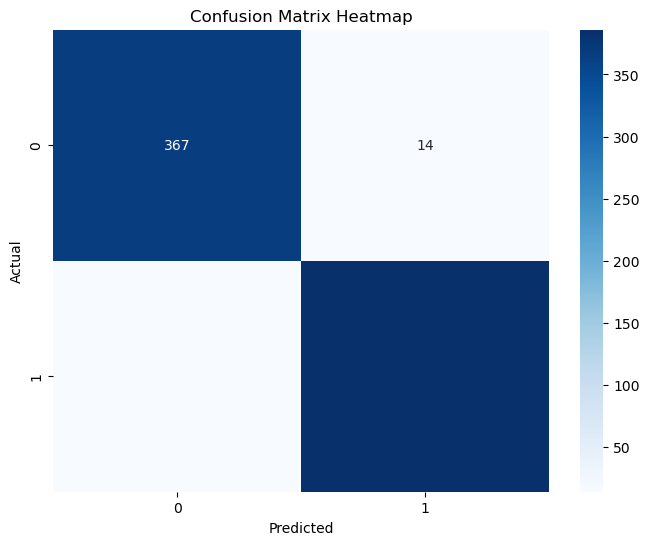

In [92]:

cm = confusion_matrix(y_val, y_pred)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap with annotations
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# title and labels
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")


plt.show()

In [48]:
# Prediction of the test set
y_predTest = random_forest_model.predict(x_test_scaled)
y_predTest

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [53]:
my_sub = pd.DataFrame({'ID': test_data['ID'], 'Spam': y_predTest})
my_sub.to_csv('r_fMLg.csv',index=False)